In [1]:
from __future__ import print_function
import pickle
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from scipy.stats import moment

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 15, 8

In [3]:
classes = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling',
           'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

In [4]:
df = pd.read_pickle('../Data/features/full_data.pkl')
df.head()

,classID,class,embedding,mfcc
0,0,air_conditioner,"[[154, 27, 142, 51, 255, 91, 129, 86, 98, 213,...","[[-688.7463581082159, 5.429540345732354, 1.262..."
1,0,air_conditioner,"[[151, 23, 121, 33, 255, 89, 144, 54, 71, 227,...","[[-55.13335103156169, 62.42337852294187, -44.2..."
2,0,air_conditioner,"[[158, 21, 145, 59, 228, 41, 130, 90, 144, 204...","[[-38.68103398712892, 67.55666019825294, -41.3..."
3,0,air_conditioner,"[[153, 24, 150, 38, 252, 83, 149, 95, 125, 238...","[[-52.16452610516994, 65.68234382111031, -41.2..."
4,0,air_conditioner,"[[153, 22, 138, 25, 255, 93, 143, 70, 96, 238,...","[[-41.984155729975406, 66.05413522960941, -33...."


In [5]:
# If this shape ISN'T of the form (t, 20), then it's wrong
# If the 20 is first, you need to transpose them
df.iloc[0]['mfcc'].shape

(173, 20)

In [6]:
# get rid of missing embeddings. this happens when the audio clip is too short
print('before dropna:', len(df))
df.dropna(inplace=True)
len(df)

before dropna: 8732


8289

In [7]:
# get all of the shapes of embeddings that we have
df['embedding'].apply(lambda x: x.shape if x is not None else x).unique()

array([(4, 128), (2, 128), (1, 128), (3, 128)], dtype=object)

In [8]:
a = df['embedding'][df['embedding'].apply(lambda x: x.shape[0]) == 1].iloc[0]
a.shape

(1, 128)

In [9]:
np.r_[a, a].shape

(2, 128)

In [10]:
for i in range(1, 6):
    print(i, moment(a, moment=i))

1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
# get all of the shapes of mfcc vectors that we have
df['mfcc'].apply(lambda x: x.shape if x is not None else x).unique()

array([(173, 20), (108, 20), (88, 20), (103, 20), (46, 20), (70, 20),
       (81, 20), (94, 20), (63, 20), (50, 20), (86, 20), (59, 20),
       (162, 20), (156, 20), (52, 20), (48, 20), (95, 20), (91, 20),
       (76, 20), (57, 20), (102, 20), (65, 20), (129, 20), (78, 20),
       (75, 20), (49, 20), (89, 20), (47, 20), (58, 20), (93, 20),
       (62, 20), (53, 20), (169, 20), (116, 20), (72, 20), (61, 20),
       (43, 20), (110, 20), (165, 20), (128, 20), (55, 20), (56, 20),
       (151, 20), (113, 20), (74, 20), (45, 20), (136, 20), (51, 20),
       (80, 20), (112, 20), (60, 20), (163, 20), (140, 20), (171, 20),
       (139, 20), (109, 20), (106, 20), (121, 20), (104, 20), (54, 20),
       (117, 20), (164, 20), (127, 20), (143, 20), (174, 20), (118, 20),
       (134, 20), (71, 20), (44, 20), (92, 20), (79, 20), (135, 20),
       (105, 20), (97, 20), (120, 20), (159, 20), (146, 20), (152, 20),
       (149, 20), (73, 20), (115, 20), (83, 20), (67, 20), (90, 20),
       (99, 20), (82, 2

In [12]:
# df['mfcc'] = df['mfcc'].apply(lambda x: x[:,1:15])

In [13]:
def aggregate_features(x, nmoments=1, moment0=1):
    '''Convert variable length numpy arrays to constant length vectors of summary statistics.'''
    mean = x.mean(axis=0)
    moments = [
        moment(x, moment=i, axis=0)
        for i in range(moment0, nmoments + moment0)
    ]
    return np.concatenate([mean] + moments)#

In [14]:
df['embedding'] = df['embedding'].apply(aggregate_features)
df['mfcc'] = df['mfcc'].apply(aggregate_features)

In [15]:
df['embedding'].apply(lambda x: x.shape).unique()

array([(256,)], dtype=object)

In [16]:
df['mfcc'].apply(lambda x: x.shape).unique()

array([(40,)], dtype=object)

In [17]:
X_vggish = np.vstack(df['embedding'].values)
X_mfcc = np.vstack(df['mfcc'].values)
Y = df['classID'].values
X_vggish.shape, X_mfcc.shape, Y.shape

((8289, 256), (8289, 40), (8289,))

In [18]:
Y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Here's what our data looks like.
So the first dimension is the time dimension, and this can change depending on how long the audio clip is. For training a model, we need to have equal size inputs, so we need to find a way to aggregate our training samples to be equal size (VGGish and MFCCs can have different sizes though). 

Here's a few options that I can think of, but if you have another idea, that can work too!
* Simply average vectors along the time dimension
* Predict class for each time sample and combine the labels (pick the post common/probable label)
* Split up each time step into separate samples, i.e. 1 embedding of size (4,128) would become 4 embeddings of size (128,)
* Pad all vectors to be the same length and feed in the embeddings with the time dimension, so our input would be size (4,128) (for example) - so if our largest embedding size is (4,128), but we have an embedding o f size (3,128) we could repeat the last vector so that it would be of size (4,128). There are a bunch of ways that we could do this, like we could just use zeros, or we could repeat the vectors from the beginning, etc. 

Also, for MFCCs at least when dealing with speech, it is common to only use the first ~13 elements, because anything higher than that is mostly noise and doesn't represent much information for extracting text from speech, but it's possible that some of that higher order information would be useful in classifying urban sound.

In [19]:
# for i, x in enumerate(X_vggish[:4],1):
#     plt.subplot(1, 4, i)
#     plt.imshow(x.T, aspect='auto')
#     plt.title('VGGish {}'.format(i))
# plt.show()

# for i, x in enumerate(X_mfcc[:4],1):
#     plt.subplot(1, 4, i)
#     plt.imshow(x[1:15,:], aspect='auto', origin='lower')
#     plt.title('MFCC {}'.format(i))
# plt.show()

In [20]:
from sklearn.manifold import TSNE

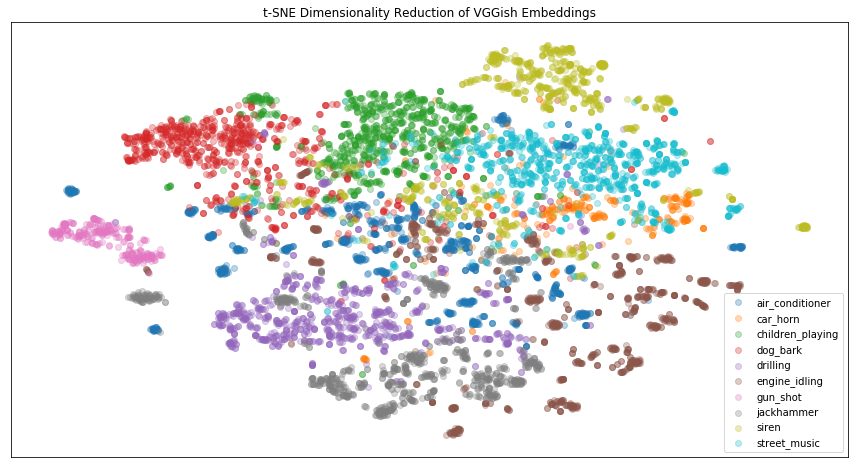

<IPython.core.display.Javascript object>

In [22]:
tsne_vggish = TSNE(2)
U_vggish = tsne_vggish.fit_transform(X_vggish)
for i, cls in enumerate(classes):
    plt.scatter(U_vggish[Y==i,0], U_vggish[Y==i,1], label=cls, alpha=0.3, edgecolors=None)
plt.title('t-SNE Dimensionality Reduction of VGGish Embeddings')
plt.xticks([])
plt.yticks([])
plt.legend();

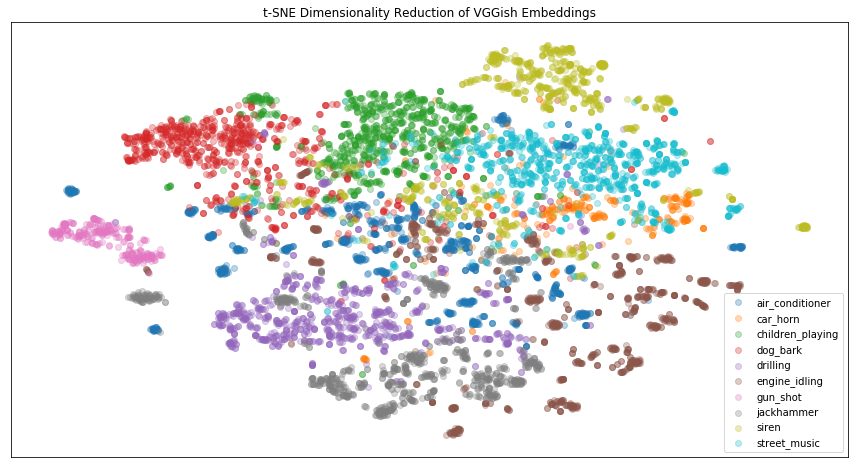

<IPython.core.display.Javascript object>

In [23]:
tsne_mfcc = TSNE(2)
U_mfcc = tsne_mfcc.fit_transform(X_mfcc)
for i, cls in enumerate(classes):
    plt.scatter(U_vggish[Y==i,0], U_vggish[Y==i,1], label=cls, alpha=0.3, edgecolors=None)
plt.title('t-SNE Dimensionality Reduction of VGGish Embeddings')
plt.xticks([])
plt.yticks([])
plt.legend();

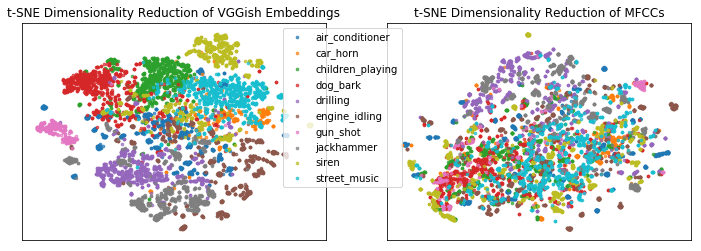

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for i, cls in enumerate(classes):
    plt.scatter(U_vggish[Y==i,0], U_vggish[Y==i,1], label=cls, alpha=0.7, s=7)
plt.title('t-SNE Dimensionality Reduction of VGGish Embeddings')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)

for i, cls in enumerate(classes):
    plt.scatter(U_mfcc[Y==i,0], U_mfcc[Y==i,1], label=cls, alpha=0.7, s=7)
plt.title('t-SNE Dimensionality Reduction of MFCCs')
plt.xticks([])
plt.yticks([])
plt.legend(bbox_to_anchor=(0.066, 1))
plt.savefig('../Report/plots/tsne_results.png');

# Running our models
So we need to decide on what we want to use. Right now it seems like we want to use:
* svm

I am open to suggestion if you'd prefer something else.

In [25]:
import time
# from sklearn.svm import SVC
# from sklearn.mixture import GaussianMixture
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [649]:
from sklearn.model_selection import GridSearchCV
print('Random Forest Grid Search Parameters:')
parameters = {
    'n_estimators': [20, 50, 100, 400],
    'max_depth': [20],
    'min_samples_split': [4]
}

X_vggish_subset, _, X_mfcc_subset, _, Y_subset, _ = train_test_split(X_vggish, X_mfcc, Y, train_size=0.3)
gs_vggish = GridSearchCV(RandomForestClassifier(), parameters).fit(X_vggish_subset, Y_subset)
gs_mfcc = GridSearchCV(RandomForestClassifier(), parameters).fit(X_mfcc_subset, Y_subset)
print('VGGish: ', gs_vggish.best_score_, gs_vggish.best_params_)
print('MFCCs: ', gs_mfcc.best_score_, gs_mfcc.best_params_)

Random Forest Grid Search Parameters:
VGGish:  0.8596138374899437 {'min_samples_split': 4, 'n_estimators': 400, 'max_depth': 20}
MFCCs:  0.7948511665325825 {'min_samples_split': 4, 'n_estimators': 400, 'max_depth': 20}


<IPython.core.display.Javascript object>

In [26]:
class EM(RandomForestClassifier):
#     def __init__(self, priors=None): #C=0.4, kernel='linear', 
#         super(EM, self).__init__(priors=None)# , probability=True
        
    def fit(self, X, y, X_test, y_test, confidence=0.5, niters=50, tol=None, verbose=False, miniter=2, *a, **kw):
        parent = super(EM, self)
        
        # identify all unlabeled samples
        unlabeled = np.isnan(y)
        n_classes = len(np.unique(np.hstack([y[~unlabeled], y_test])))
        
        # perform initial fit using only labeled data
        parent.fit(X[~unlabeled], y[~unlabeled])
        
        # break out if there's no unlabeled data cuz we're done
        if not unlabeled.sum():
            return self
                
        # we need to create a row for each possible class for the unlabeled data
        X_expanded = np.concatenate(
            [X[~unlabeled]] + [X[unlabeled]]*n_classes
        )
        # labeled [y0, y1, ...], + unlabeled [0,0,0,...,1,1,1,...,n_classes-1,n_classes-1,...]
        y_expanded = np.hstack(
            [y[~unlabeled]] + list(np.c_[ [np.arange(n_classes)]*len(y[unlabeled]) ].T.ravel())
        )
        
        unlabeled_expanded = np.arange(len(y_expanded)) >= len(y[~unlabeled])
        weights = np.ones(len(y_expanded))
        
        # perform EM
        i = 0
        acc_test_prev = 0
        acc_test = (tol or 0) + 1 # init above tolerance
        while i < niters and (not tol or acc_test - acc_test_prev > tol or i < miniter):
            i += 1

            # update the weights based on prediction probabilities
            prob2 = self.predict_proba(X[unlabeled])
            prob = prob2.T.ravel()
            weights[unlabeled_expanded] = prob
            weights[weights < confidence] = 0

            # refit model based on updated weights
            parent.fit(X_expanded, y_expanded, sample_weight=weights) # refits the classifier
            
            # calculate accuracy
            acc_test_prev = acc_test
            acc_train = (self.predict(X) == y).mean()
            acc_test = (self.predict(X_test) == y_test).mean()
            
            if verbose:
                print('** Iteration {} ({}s):'.format(i, time.time() - t))
                print('In-sample Accuracy: {:.2%}'.format(acc_train))
                print('Out-of-sample Accuracy: {:.2%}'.format(acc_test))
                print()
        
        return self


In [27]:
def get_model_stats(model, X_train, y_train, X_test, y_test, em_iters=100):
    return dict(
        model=model,
        train_accuracy=(model.predict(X_train) == y_train).astype(float).mean(),
        test_accuracy=(model.predict(X_test) == y_test).astype(float).mean()
    )

def idxs2mask(length, idxs):
    # convert array of index values to a boolean mask
    unlabeled = np.zeros(length).astype(bool)
    unlabeled[idxs] = True
    return unlabeled

def results_to_np(results, features='vggish', train_test='test'):
    '''Converts results into numpy array
    Arguments:
        label_dist (float): the proportion label distribution (see: label_distributions)
        features (str): can be - vggish|mfcc|vggish_sup|mfcc_sup
        train_test (str): can be - train|test
    Returns:
        np.array of size (len(label_distributions), iters_per_dist)
    '''
    return np.array([
        [
            r[features][train_test + '_accuracy'] 
            for r in results[label_dist]
        ] for label_dist in sorted(results.keys())
    ])

def train_models(X_vggish, X_mfcc, y, label_dist, em_iters=100, tol=0.00001, confidence=0.5):
    # train/test split
    i_train, i_test, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.33)
    X_vggish_train, X_vggish_test = X_vggish[i_train], X_vggish[i_test]
    X_mfcc_train, X_mfcc_test = X_mfcc[i_train], X_mfcc[i_test]
    
    
    # normalize between -1 and 1
    scaler_vggish = StandardScaler().fit(X_vggish_train)
    X_vggish_train = scaler_vggish.transform(X_vggish_train)
    X_vggish_test = scaler_vggish.transform(X_vggish_test)
    
    scaler_mfcc = StandardScaler().fit(X_mfcc_train)
    X_mfcc_train = scaler_mfcc.transform(X_mfcc_train)
    X_mfcc_test = scaler_mfcc.transform(X_mfcc_test)
    
    y_train_partial = y_train.copy().astype(float)

    # get mask to select which labels to remove
    if label_dist >= 1: # special case where there's no unlabeled data. train_test_split would throw an error
        unlabeled, labeled = np.zeros(len(y_train)).astype(bool), np.ones(len(y_train)).astype(bool)
    else:
        unlabeled, labeled = train_test_split(np.arange(len(y_train)), stratify=y_train, test_size=label_dist)
        unlabeled = idxs2mask(len(y_train), unlabeled)
        labeled = idxs2mask(len(y_train), labeled)
    
    # remove labels
    y_train_partial[unlabeled] = None

    
#     # train model - use gridsearch when you get a chance probability=True, kernel='linear'
    model_vggish = EM().fit(X_vggish_train, y_train_partial, 
                            X_vggish_test, y_test, niters=em_iters, tol=tol, confidence=confidence)
    model_mfcc = EM().fit(X_mfcc_train, y_train_partial, 
                          X_mfcc_test, y_test, niters=em_iters, tol=tol, confidence=confidence)
    
    # run normal supervised learning (dropping the unlabeled data)
    model_vggish_sup = EM().fit(X_vggish_train[labeled], y_train_partial[labeled], 
                                X_vggish_test, y_test, niters=em_iters, tol=tol, confidence=confidence)
    model_mfcc_sup = EM().fit(X_mfcc_train[labeled], y_train_partial[labeled], 
                              X_mfcc_test, y_test, niters=em_iters, tol=tol, confidence=confidence)
#     model_vggish = LabelPropagation(kernel='knn').fit(X_vggish_train, y_train_partial)
#     model_mfcc = LabelPropagation(kernel='knn').fit(X_mfcc_train, y_train_partial)
    
    # return stats for each model
    return dict(
        # return the model stats
        vggish=get_model_stats(model_vggish, X_vggish_train, y_train, X_vggish_test, y_test),
        mfcc=get_model_stats(model_mfcc, X_mfcc_train, y_train, X_mfcc_test, y_test),
        vggish_sup=get_model_stats(model_vggish_sup, X_vggish_train, y_train, X_vggish_test, y_test),
        mfcc_sup=get_model_stats(model_mfcc_sup, X_mfcc_train, y_train, X_mfcc_test, y_test),
        
        # save the feature scalers used
        scaler_vggish=scaler_vggish,
        scaler_mfcc=scaler_mfcc
    )


train_models(X_vggish, X_mfcc, Y, 1, em_iters=5)

{'mfcc': {'model': EM(bootstrap=True, class_weight=None, criterion='gini', max_depth=None,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False,
    random_state=None, verbose=0, warm_start=False),
  'test_accuracy': 0.814327485380117,
  'train_accuracy': 0.9962182603997839},
 'mfcc_sup': {'model': EM(bootstrap=True, class_weight=None, criterion='gini', max_depth=None,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False,
    random_state=None, verbose=0, warm_start=False),
  'test_accuracy': 0.8168859649122807,
  'train_accuracy': 0.9981991716189447},
 'scaler_mfcc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler_vggish': StandardScaler(

In [28]:
label_distributions = [0.01, 0.03, 0.05, 0.08, 0.1, 0.3, 0.5, 0.7, 1]

def calc_label_distributions(confidence=0.5, iters_per_dist=10):
    t = time.time()
    results = {}

    # proportion of training samples with labels
    for label_dist in label_distributions:
        ti = time.time()
        print(label_dist)
        results[label_dist] = []
        for i in np.arange(iters_per_dist):
            print(i, end=' ')
            results[label_dist].append(train_models(X_vggish, X_mfcc, Y, label_dist, em_iters=5, confidence=confidence))#, tol=0.01
        print(time.time() - ti, max([r['vggish']['test_accuracy'] for r in results[label_dist]]))
        ti = time.time()
    print('total time for {}*{} iterations'.format(len(label_distributions), iters_per_dist), time.time() - t)     
    return results

results = calc_label_distributions(iters_per_dist=30)

# row=label_distribution, column=iteration
print('Test Results for VGGish:')
results_to_np(results)

0.01
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 97.152328968 0.6235380116959064
0.03
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
results_vgg_test = results_to_np(results, features='vggish')
results_mfcc_test = results_to_np(results, features='mfcc')
results_vgg_sup_test = results_to_np(results, features='vggish_sup')
results_mfcc_sup_test = results_to_np(results, features='mfcc_sup')

print('Average VGGish Results')
pd.Series(results_vgg_test.mean(1), index=label_distributions)

In [640]:
print(results_to_np(results, features='mfcc', train_test='test'))
print('')
print(results_to_np(results, features='mfcc', train_test='train'))

[[0.29532164 0.3000731  0.27302632 0.31980994 0.26608187 0.30847953
  0.31067251 0.25219298 0.30372807 0.2748538  0.31944444 0.23318713
  0.31103801 0.29203216 0.3380848  0.35197368 0.30153509 0.27375731
  0.29824561 0.29751462 0.30409357 0.29532164 0.32127193 0.36878655
  0.27997076 0.30738304 0.28837719 0.27704678 0.28654971 0.33479532]
 [0.43421053 0.48172515 0.41520468 0.43603801 0.46856725 0.45248538
  0.47185673 0.39071637 0.50219298 0.48099415 0.46125731 0.49122807
  0.39875731 0.47770468 0.44334795 0.44919591 0.49634503 0.42872807
  0.46893275 0.48464912 0.46089181 0.47331871 0.45650585 0.48026316
  0.44919591 0.44261696 0.44042398 0.44846491 0.46345029 0.41520468]
 [0.50913743 0.51425439 0.53983918 0.50292398 0.52229532 0.52412281
  0.49890351 0.5252193  0.52631579 0.53106725 0.52083333 0.51388889
  0.55665205 0.5124269  0.54057018 0.51754386 0.53435673 0.48903509
  0.48172515 0.50804094 0.52595029 0.53106725 0.52046784 0.52668129
  0.49159357 0.51937135 0.50840643 0.50657895 

In [ ]:
# png plot size
plt.rcParams['figure.figsize'] = 8, 5
# notebook plot size
# plt.rcParams['figure.figsize'] = 15, 8

In [ ]:
plt.plot(label_distributions, results_vgg_test.mean(1), label='VGGish Semi-Supervised')
plt.plot(label_distributions, results_mfcc_test.mean(1), label='MFCC Semi-Supervised')
plt.plot(label_distributions, results_vgg_sup_test.mean(1), label='VGGish Supervised')
plt.plot(label_distributions, results_mfcc_sup_test.mean(1), label='MFCC Supervised')
plt.title('Average Test Accuracy vs. Proportion of Labeled Data in Training Set')
plt.xlabel('Proportion of Labeled Data')
plt.ylabel('Test Accuracy')
# plt.ylim([0, None])
plt.legend(loc='lower right')
plt.savefig('../Report/plots/test-accuracy.png');

In [ ]:
# # plot over several confidence thresholds
# results_conf = {}
# confidences = [0.3, 0.5, 0.7]
# for conf in confidences:
#     results_conf[conf] = calc_label_distributions(confidence=conf, iters_per_dist=1)

# for conf in results_conf:
#     plt.plot(label_distributions, results_to_np(results_conf[conf]).mean(1), label='VGGish Confidence {}'.format(conf))
# for conf in results_conf:
#     plt.plot(label_distributions, results_to_np(results_conf[conf], features='mfcc').mean(1), label='MFCC Confidence {}'.format(conf))

# plt.plot(label_distributions, results_vgg_sup_test.mean(1), '--', label='VGGish Supervised')
# plt.plot(label_distributions, results_mfcc_sup_test.mean(1), '--', label='MFCC Supervised')
# plt.title('Test Accuracy over Different Distributions of Labeled Data')
# plt.xlabel('Proportion of Labeled Data')
# plt.ylabel('Test Accuracy')
# plt.legend();

In [ ]:
results_mfcc_test.shape, len(label_distributions)

In [ ]:
plt.boxplot(results_vgg_test.T, positions=label_distributions)
plt.boxplot(results_mfcc_test.T, positions=label_distributions)
plt.legend();

In [ ]:
def ci_plot(label_distributions, Y, label=None):
    mean = np.mean(Y, axis=1)
    std = np.std(Y, axis=1)
    plt.fill_between(label_distributions, mean - 2*std, mean + 2*std, alpha=0.2)
    plt.plot(label_distributions, mean, label=label)

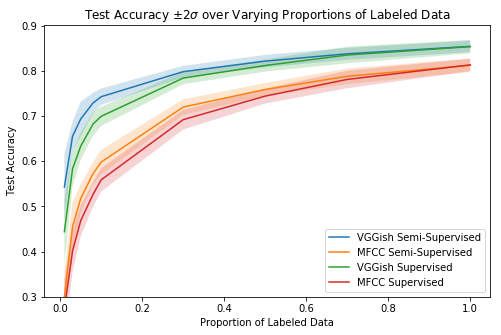

In [553]:
ci_plot(label_distributions, results_vgg_test, 'VGGish Semi-Supervised')
ci_plot(label_distributions, results_mfcc_test, 'MFCC Semi-Supervised')
ci_plot(label_distributions, results_vgg_sup_test, 'VGGish Supervised')
ci_plot(label_distributions, results_mfcc_sup_test, 'MFCC Supervised')
plt.title('Test Accuracy $\pm 2\sigma$ over Varying Proportions of Labeled Data')
plt.xlabel('Proportion of Labeled Data')
plt.ylabel('Test Accuracy')
plt.ylim([0.3, None])
plt.legend(loc='lower right')
plt.savefig('../Report/plots/test-accuracy-ci.png');

In [521]:
from scipy import stats

In [522]:
tuple(stats.ks_2samp(results_vgg_test[0], results_vgg_sup_test[0]))

(0.9, 8.383579081682083e-12)

In [523]:
def get_ks_results(result1, result2):
    return pd.DataFrame([
        tuple(stats.ks_2samp(x1, x2))
        for x1, x2 in zip(result1, result2)
    ], index=label_distributions, columns=['KS Statistic', 'P Value'])

In [524]:
ks_vggish = get_ks_results(results_vgg_test, results_vgg_sup_test)
ks_vggish

,KS Statistic,P Value
0.01,0.900000,8.383579e-12
0.03,1.000000,1.797255e-14
0.05,0.966667,1.497719e-13
0.08,0.966667,1.497719e-13
0.10,1.000000,1.797255e-14
0.30,0.766667,1.108808e-08
0.50,0.566667,6.174024e-05
0.70,0.300000,1.088384e-01
1.00,0.266667,2.003252e-01


In [525]:
ks_mfcc = get_ks_results(results_mfcc_test, results_mfcc_sup_test)
ks_mfcc

,KS Statistic,P Value
0.01,0.400000,1.131365e-02
0.03,0.800000,2.047957e-09
0.05,0.900000,8.383579e-12
0.08,0.966667,1.497719e-13
0.10,0.900000,8.383579e-12
0.30,0.833333,3.520233e-10
0.50,0.633333,4.643599e-06
0.70,0.366667,2.585627e-02
1.00,0.133333,9.360086e-01


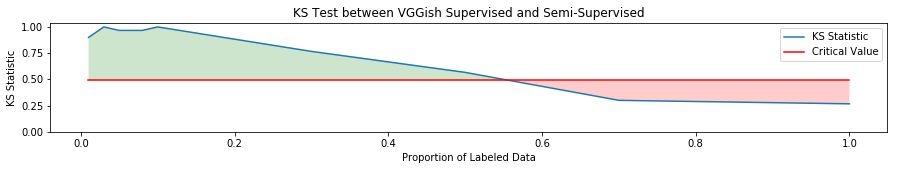

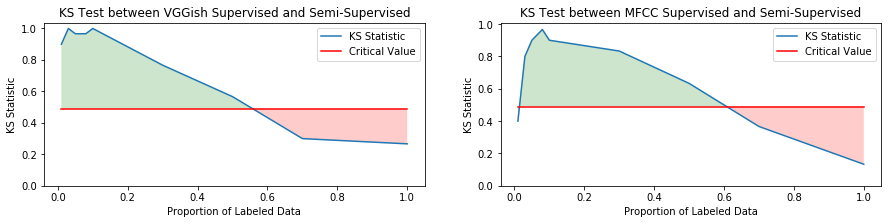

In [576]:
# critical values: http://www.mathematik.uni-kl.de/~schwaar/Exercises/Tabellen/table_kolmogorov.pdf
ks_critical_value = 0.490 # for n=10

plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
ks_vggish['KS Statistic'].plot()
plt.plot([label_distributions[0], label_distributions[-1]], [ks_critical_value, ks_critical_value], 'r', label='Critical Value')
plt.fill_between(label_distributions, ks_vggish['KS Statistic'], [ks_critical_value]*len(ks_stat_vggish), where=ks_vggish['KS Statistic']<ks_critical_value, facecolor='red', interpolate=True, alpha=0.2)
plt.fill_between(label_distributions, ks_vggish['KS Statistic'], [ks_critical_value]*len(ks_stat_vggish), where=ks_vggish['KS Statistic']>ks_critical_value, facecolor='green', interpolate=True, alpha=0.2)
plt.title('KS Test between VGGish Supervised and Semi-Supervised')
plt.xlabel('Proportion of Labeled Data')
plt.ylabel('KS Statistic')
plt.ylim([0, None])
plt.legend()

plt.subplot(1, 2, 2)

ks_mfcc['KS Statistic'].plot()
plt.plot([label_distributions[0], label_distributions[-1]], [ks_critical_value, ks_critical_value], 'r', label='Critical Value')
plt.fill_between(label_distributions, ks_mfcc['KS Statistic'], [ks_critical_value]*len(ks_vggish), where=ks_mfcc['KS Statistic']<ks_critical_value, facecolor='red', interpolate=True, alpha=0.2)
plt.fill_between(label_distributions, ks_mfcc['KS Statistic'], [ks_critical_value]*len(ks_vggish), where=ks_mfcc['KS Statistic']>ks_critical_value, facecolor='green', interpolate=True, alpha=0.2)
plt.title('KS Test between MFCC Supervised and Semi-Supervised')
plt.xlabel('Proportion of Labeled Data')
plt.ylabel('KS Statistic')
plt.ylim([0, None])
plt.legend()
plt.savefig('../Report/plots/ks-test.png');

In [466]:
def to0_1(X):
    return (X - X.mean(1).min()) / (X.mean(1).max() - X.mean(1).min())

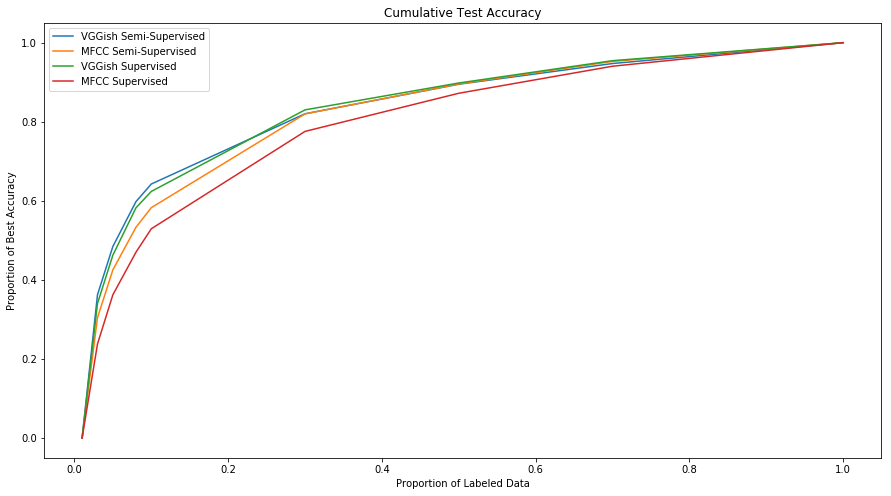

In [550]:
# this isn't totally what I expected. Not sure if we'll do anything with this after all
plt.plot(label_distributions, np.mean(to0_1(results_vgg_test), axis=1), label='VGGish Semi-Supervised')
plt.plot(label_distributions, np.mean(to0_1(results_mfcc_test), axis=1), label='MFCC Semi-Supervised')
plt.plot(label_distributions, np.mean(to0_1(results_vgg_sup_test), axis=1), label='VGGish Supervised')
plt.plot(label_distributions, np.mean(to0_1(results_mfcc_sup_test), axis=1), label='MFCC Supervised')
plt.title('Cumulative Test Accuracy')
plt.xlabel('Proportion of Labeled Data')
plt.ylabel('Proportion of Best Accuracy')
plt.legend()
plt.savefig('../Report/plots/cumulative-test-accuracy.png');

This is just everything normalized by the max accuracy. It shows that the models converge on their solution faster when not considering the unlabeled data.

In [338]:
# never mind. the file ended up being like 2GB......
# # saving things so we can reload
# with open('../Data/results.pkl', 'w') as f:
#     pickle.dump(results, f)

<IPython.core.display.Javascript object>

## Plots that we want!
* Box plot/confidence interval plot overall accuracy
* Scaled proportional to max accuracy - line plot
* confusion matrices - from a variety of label distributions

In [344]:
best_vggish = max(results[label_distributions[-1]], key=lambda d: d['vggish']['test_accuracy'])
best_vggish

{'mfcc': {'model': EM(bootstrap=True, class_weight=None, criterion='gini', max_depth=None,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False,
    random_state=None, verbose=0, warm_start=False),
  'test_accuracy': 0.8289473684210527,
  'train_accuracy': 0.9974788402665226},
 'mfcc_sup': {'model': EM(bootstrap=True, class_weight=None, criterion='gini', max_depth=None,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False,
    random_state=None, verbose=0, warm_start=False),
  'test_accuracy': 0.8070175438596491,
  'train_accuracy': 0.996938591752206},
 'scaler_mfcc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler_vggish': StandardScaler(

In [345]:
y_pred = best_vggish['vggish']['model'].predict(best_vggish['scaler_vggish'].transform(X_vggish))
y_pred.shape, Y.shape

((8289,), (8289,))

In [149]:
df1 = pd.DataFrame([Y, y_pred], index=['Actual', 'Predicted']).T
df1.head()

,Actual,Predicted
0,0.0,5.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [150]:
counts_per_class = df.groupby('classID')['classID'].count()

In [151]:
conf_matrix = df1.reset_index().groupby(['Actual', 'Predicted']).count().unstack().fillna(0).div(counts_per_class, axis=0)
conf_matrix

index                                                    \
Predicted       0.0       1.0       2.0       3.0       4.0       5.0   
Actual                                                                  
0.0        0.893000  0.000000  0.005000  0.005000  0.011000  0.038000   
1.0        0.016779  0.791946  0.016779  0.003356  0.003356  0.010067   
2.0        0.013000  0.000000  0.905000  0.024000  0.006000  0.007000   
3.0        0.029954  0.002304  0.042627  0.880184  0.009217  0.004608   
4.0        0.021164  0.007407  0.003175  0.004233  0.894180  0.008466   
5.0        0.082329  0.001004  0.007028  0.000000  0.002008  0.862450   
6.0        0.000000  0.000000  0.000000  0.000000  0.003497  0.000000   
7.0        0.020408  0.001020  0.002041  0.000000  0.028571  0.028571   
8.0        0.038210  0.010917  0.020742  0.007642  0.004367  0.019651   
9.0        0.022000  0.007000  0.028000  0.003000  0.008000  0.009000   

                                                   
Predicted       6.0       7.0       8.0       9.0  
Actual                                             
0.0        0.000000  0.020000  0.008000  0.020000  
1.0        0.000000  0.026846  0.043624  0.087248  
2.0        0.001000  0.003000  0.018000  0.023000  
3.0        0.000000  0.001152  0.016129  0.013825  
4.0        0.000000  0.041270  0.012698  0.007407  
5.0        0.001004  0.027108  0.006024  0.011044  
6.0        0.996503  0.000000  0.000000  0.000000  
7.0        0.000000  0.917347  0.002041  0.000000  
8.0        0.000000  0.001092  0.875546  0.021834  
9.0        0.000000  0.008000  0.014000  0.901000

In [442]:
df.groupby('class')['class'].count().rename('Counts').to_frame().T

class,air_conditioner,car_horn,children_playing,dog_bark,drilling,engine_idling,gun_shot,jackhammer,siren,street_music
Counts,1000,298,1000,868,945,996,286,980,916,1000


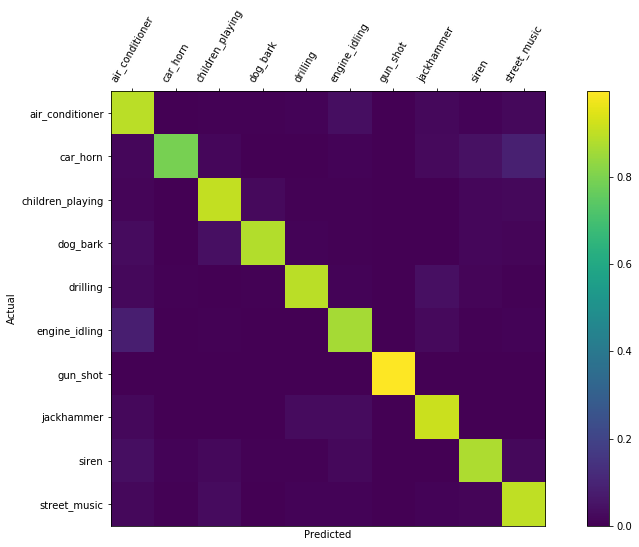

In [153]:
plt.imshow(conf_matrix.values)
plt.xticks(range(len(classes)), classes, rotation=60)
plt.yticks(range(len(classes)), classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gca().xaxis.tick_top()
plt.colorbar();

In [293]:
import grid
reload(grid)
from grid import Grid

In [432]:
def draw_confusion_matrix(model, scaler, X):
    # predict classes and create confusion matrix
    y_pred = model.predict(scaler.transform(X))
    df1 = pd.DataFrame([Y, y_pred], index=['Actual', 'Predicted']).T
    conf_matrix = df1.reset_index().groupby(['Actual', 'Predicted']).count().unstack().fillna(0).div(counts_per_class, axis=0)
    
    # plot
    nice_classes = [c.replace('_', ' ') for c in classes]
    ax = plt.imshow(conf_matrix.values, vmin=0, vmax=1)
    plt.xticks(range(len(classes)), nice_classes, rotation=75)
    plt.yticks(range(len(classes)), nice_classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
#     plt.gca().xaxis.tick_top()
    plt.tight_layout()
    return ax
    
def draw_best_confusion_matrix(label_distribution, features='vggish'):
    # get best model
    best = max(results[label_distribution], key=lambda d: d[features]['test_accuracy'])
    # draw confusion matrix
    feature_name = features[:-4] if features.endswith('_sup') else features
    X = globals().get('X_'+feature_name)
    draw_confusion_matrix(best[features]['model'], best['scaler_'+feature_name], X)

In [433]:
label_distributions

[0.01, 0.03, 0.05, 0.08, 0.1, 0.3, 0.5, 0.7, 1]

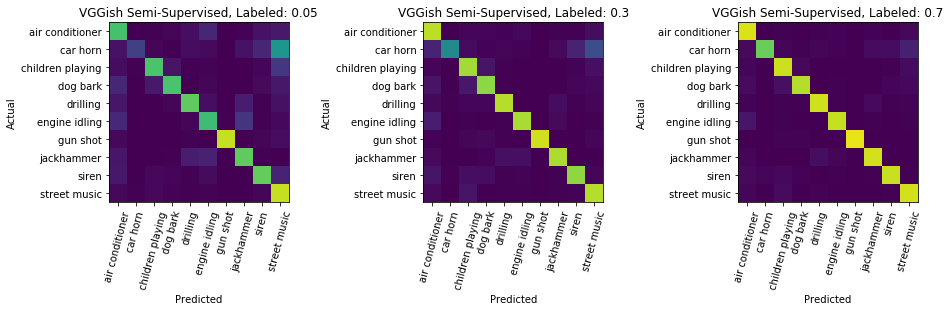

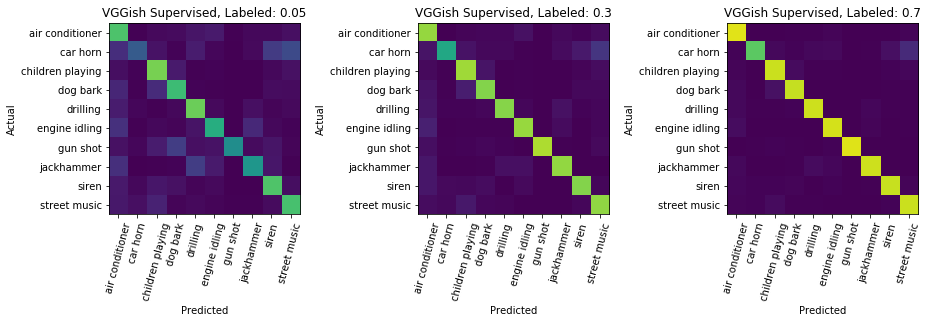

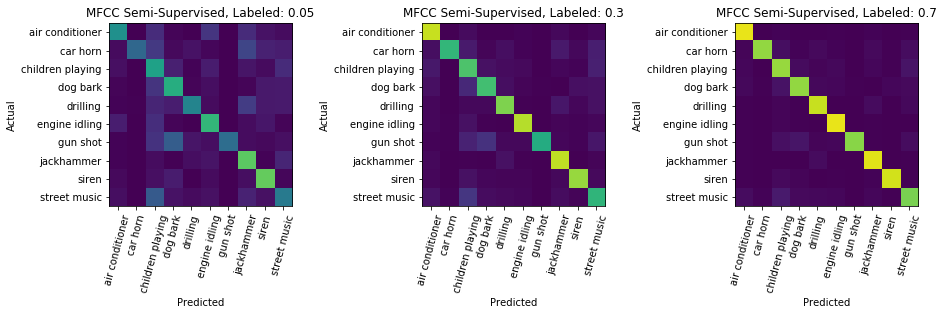

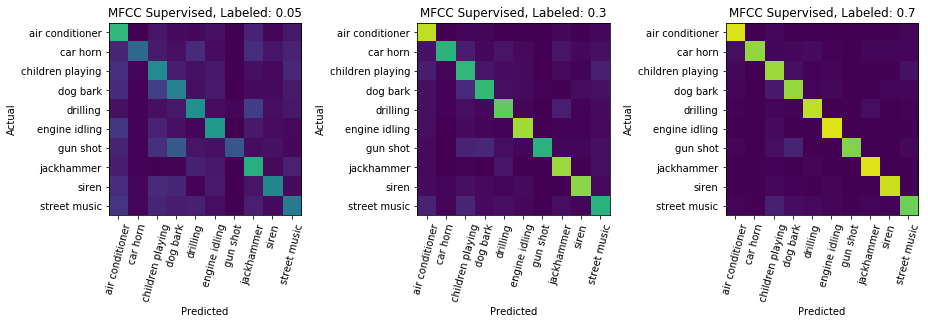

In [635]:
# plt.figure(figsize=(8, 14))
# g = Grid(3)

conf_matrix_dists = [0.05, 0.3,  0.7]
feature_labels = {'vggish': 'VGGish Semi-Supervised', 'vggish_sup': 'VGGish Supervised', 'mfcc': 'MFCC Semi-Supervised', 'mfcc_sup': 'MFCC Supervised'}

for feature in ['vggish', 'vggish_sup', 'mfcc', 'mfcc_sup']:
    fig = plt.figure(figsize=(13,10))
    for i, d in enumerate(conf_matrix_dists, 1):
        plt.subplot(1, len(conf_matrix_dists), i)
        draw_best_confusion_matrix(d, features=feature)
        plt.title('{}, Labeled: {}'.format(feature_labels[feature], d))
        plt.xlabel('Predicted')
    axes = fig.get_axes()
    axes[0].get_shared_y_axes().join(*axes)
    plt.savefig('../Report/plots/conf_matrix_{}_{}.png'.format(feature, ','.join(map(str, conf_matrix_dists))))
    plt.show()
        
    
# plt.colorbar();
# g